## 0

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

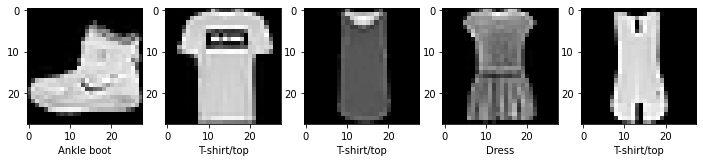

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize = (12, 4))

for i, ax in enumerate(axes):
    ax.imshow(train_images[i], cmap = "gray")
    ax.set_xlabel(class_names[train_labels[i]])

plt.show()

In [5]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

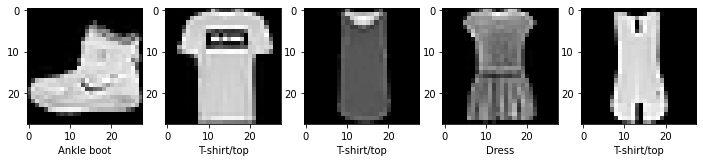

In [7]:
fig, axes = plt.subplots(1, 5, figsize = (12, 4))

for i, ax in enumerate(axes):
    ax.imshow(train_images_normalized[i], cmap = "gray")
    ax.set_xlabel(class_names[train_labels[i]])

plt.show()

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

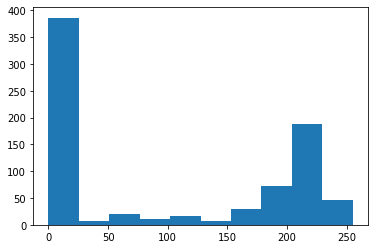

In [8]:
plt.hist(train_images[0].flatten())

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

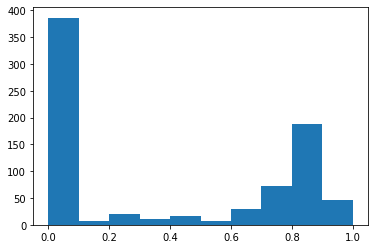

In [9]:
plt.hist(train_images_normalized[0].flatten())

In [10]:
np.bincount(train_labels)


array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [11]:
np.unique(train_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

## 1

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

model_no_hidden = Sequential(name = "mlp_0_hidden")
model_no_hidden.add(Flatten(input_shape = (28, 28), name = "input_layer"))
model_no_hidden.add(Dense(64, name = "hidden3", activation = "relu"))
model_no_hidden.add(Dense(10, name = "output", activation = "softmax"))

model_no_hidden.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [42]:
model_no_hidden.summary()

Model: "mlp_0_hidden"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden3 (Dense)             (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_no_hidden.fit(train_images_normalized, train_labels, validation_split = 1/6, epochs = 20, verbose = 1)

Epoch 1/20
   8/1563 [..............................] - ETA: 12s - loss: 2.2586 - accuracy: 0.1680     

2022-04-26 23:50:25.383031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 579/1563 [==========>...................] - ETA: 4s - loss: 0.6701 - accuracy: 0.7696

KeyboardInterrupt: 

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_no_hidden.predict(test_images)
y_pred = np.argmax(y_pred, axis = 1)

2022-04-26 23:49:45.824866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.97      0.98      0.97      1000
           2       0.86      0.66      0.75      1000
           3       0.92      0.82      0.87      1000
           4       0.63      0.94      0.75      1000
           5       0.98      0.92      0.95      1000
           6       0.74      0.61      0.67      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.95      0.96      1000
           9       0.88      0.98      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



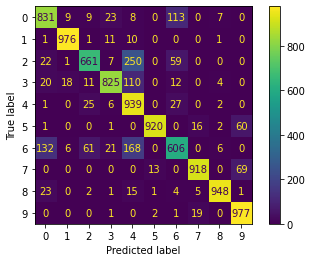

In [37]:
print(classification_report(test_labels, y_pred))
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(cm).plot()